## Load Stuff

In [1]:
import torch
from mario_gpt import MarioDataset, MarioLM
from mario_gpt.utils import view_level, convert_level_to_png, join_list_of_list, characterize

### Load Model

In [2]:
mario_lm = MarioLM()

Using shyamsn97/Mario-GPT2-700-context-length lm


/home/matthias/Documents/envs/alife-music/lib/python3.10/site-packages/transformers/models/auto/modeling_auto.py:1739: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


Using shyamsn97/Mario-GPT2-700-context-length tokenizer


### Load Dataset (Optional)

In [3]:
dataset = MarioDataset(mario_lm.tokenizer)

Token indices sequence length is longer than the specified maximum sequence length for this model (102116 > 1024). Running this sequence through the model will result in indexing errors


No level string specified, using default string FULL_LEVEL_STR_WITH_PATHS...





#### View string representation of level

In [4]:
view_level(dataset.input_ids[:700], mario_lm.tokenizer)

['--------------------------------------------------',
 '--------------------------------------------------',
 '--------------------------------------------------',
 '--------------------------------------------------',
 '-------------------------------------------------o',
 '--------XSSSSS---------------------------------SSS',
 '--------X-----------------------------------------',
 '--------X-----------------------------------------',
 '-------EX--E-X---------------xxxx-?-----------xxxx',
 '--------XSS?SX---QQ?QQ------xx<>-x-----------xx--?',
 '---------------------------xx-[]--x---------xx----',
 '--------------------------xx--[]---x-------xx-----',
 'xxxxxxxxxxxxxxxxxxxxxxxxxxx---[]----xxxxxxxx------',
 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---XXX']

#### Image

##### Previewing the first 50 columns of the dataset

/usr/lib/python3/dist-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


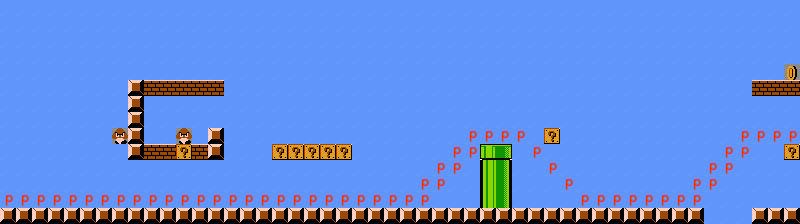

In [5]:
img = convert_level_to_png(dataset.input_ids[:700],  mario_lm.tokenizer)[0]
img

#### Set device

In [6]:
device = torch.device('cpu')
mario_lm = mario_lm.to(device)

## Generating Levels

In [7]:
prompts = ["many pipes, many enemies, some blocks, high elevation"]

##### We generate 1399 predictions for an even 1400 output (including the input seed which is just a single block). Mario Levels have height of 14, so we generate 100 columns. You don't have to worry about perfect dimensions, we'll trim the remainder for you!

In [8]:
generated_level = mario_lm.sample(
    prompts=prompts,
    num_steps=1400,
    temperature=2.0,
    use_tqdm=True
)

shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 56, last: 56: 100%|█| 


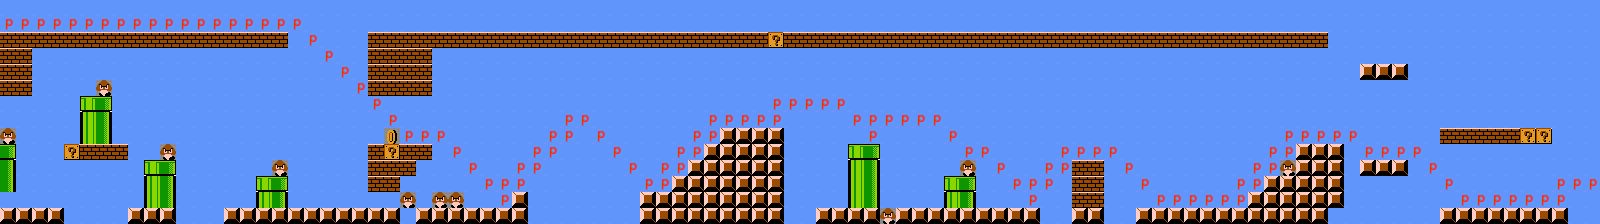

In [9]:
generated_level.img

#### Check if the model generated the correct level
##### Because of the stochastic nature of the model and the small training dataset, the model may generate levels that do not completely match the given prompt

In [10]:
generated_level.prompt

'some pipes, many enemies, many blocks, high elevation'

## Generate Midi

In [13]:
generated_level.generate_midi()


Running Astar agent on level! -- /tmp/tmp93iijwem.txt


Exception in thread "main" java.lang.ArrayIndexOutOfBoundsException: Index 3 out of bounds for length 3
	at PlayAstar.main(PlayAstar.java:92)


TypeError: 'NoneType' object is not subscriptable

## Run Astar Agent

In [ ]:
generated_level.run_astar()

## Continue generation

### You can also continue generation, making giant levels

In [ ]:
# different prompt
prompts = ["no pipes, some enemies, some blocks, high elevation"]

In [ ]:
generated_level_continued = mario_lm.sample(
    seed=generated_level,
    prompts=prompts,
    num_steps=1400,
    temperature=2.0,
    use_tqdm=True
)

In [ ]:
generated_level_continued.img

In [ ]:
generated_level_continued.run_astar()

## Batch multiple prompts

In [ ]:
prompts = ["no pipes, many enemies, some blocks, high elevation", "many pipes, no enemies, many blocks, high elevation", "many pipes, many enemies, little blocks, low elevation"]

generated_levels = mario_lm.sample(
    prompts=prompts,
    num_steps=1400,
    temperature=2.0,
    use_tqdm=True
)

In [ ]:
generated_levels[0].img

In [ ]:
generated_levels[1].img

In [ ]:
generated_levels[2].img

### Generate Timelapses

In [ ]:
from mario_gpt.utils import generate_timelapse

In [ ]:
timelapse_0 = generate_timelapse(generated_levels[0].level_tensor, mario_lm)

In [ ]:
timelapse_1 = generate_timelapse(generated_levels[1].level_tensor, mario_lm)

In [ ]:
timelapse_2 = generate_timelapse(generated_levels[2].level_tensor, mario_lm)

In [ ]:
# save
# import imageio
# imageio.mimsave('timelapse_0.gif',timelapse_0,fps=60)